# College Football Data EDA

In [17]:
#import packages
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('../../Data/model-data/model_data.csv', index_col = 0)

#replace independent with ind. for better graphs
df.loc[df['Team Conference'] == 'Independent', 'Team Conference'] = 'Ind.'
df.loc[df['Opponent Conference'] == 'Indepedent', 'Opponent Conference'] = 'Ind.'

df.head(5)


,Opponent,syn_date,Year,Team Win,Team Conference,Opponent Conference,Team Win_3_game_average,Team Earned YPPA_3_game_average,Team Earned YPRA_3_game_average,Team Allowed YPRA_3_game_average,...,Opp Coaches Compensation,Opp Athletic Student Aid,Opp Total Revenues,"Opp Corporate Sponsorship, Advertising, Licensing",Opp Donor Contributions,Opp Competition Guarantees,Opp Ticket Sales,Opp Total Football Spending,Opp footall_expense_pct,Opp football_expense_pct
Team,,,,,,,,,,,,,,,,,,,,,
Akron,Ohio State,2011-09-01,2011,0,MAC,Big 10,NaN,NaN,NaN,NaN,...,16511360.0,15129920.0,131815821.0,12162905.0,17636938.0,3853330.0,50009395.0,44287914.0,0.362164,0.362164
Alabama,Kent State,2011-09-01,2011,1,SEC,MAC,NaN,NaN,NaN,NaN,...,3763340.0,5287795.0,21448821.0,424323.0,435339.0,822050.0,669316.0,11774328.0,0.567253,0.567253
Arkansas State,Illinois,2011-09-01,2011,0,Sun Belt,Big 10,NaN,NaN,NaN,NaN,...,10259368.0,9847571.0,77863883.0,4553520.0,16437955.0,1376000.0,16533261.0,29526365.0,0.401846,0.401846
Army,Northern Illinois,2011-09-01,2011,0,Ind.,MAC,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Auburn,Utah State,2011-09-01,2011,1,SEC,WAC,NaN,NaN,NaN,NaN,...,3887698.0,4389402.0,22777944.0,564983.0,1869811.0,831640.0,1965806.0,11704878.0,0.594142,0.594142


## Wins By Conference

### Total Wins by Conference

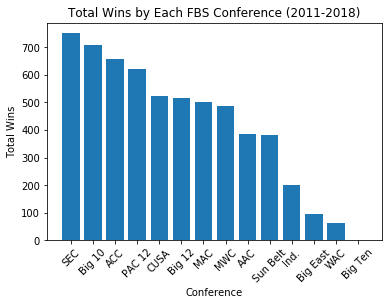

In [19]:
#wins by conference
dfPlt = df.groupby('Team Conference')['Team Win'].sum().\
                                             reset_index(name ='Total Wins').\
                                             sort_values('Total Wins', ascending = False)


plt.bar(x = dfPlt['Team Conference'], height = dfPlt['Total Wins'])
plt.title('Total Wins by Each FBS Conference (2011-2018)')
plt.xlabel('Conference')
plt.ylabel('Total Wins')
plt.xticks(rotation=45)
plt.show()

### Total Yearly Wins by Conference

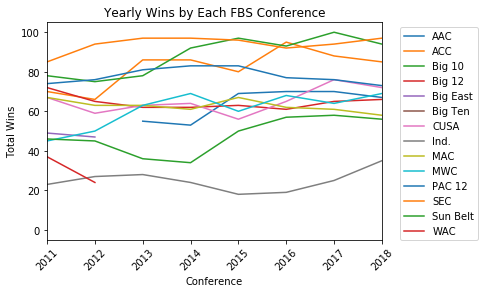

In [20]:
#wins by conference by year
dfPlt = df.groupby(['Team Conference', 'Year'])['Team Win'].sum().\
                                             reset_index(name ='Total Wins').\
                                             sort_values('Year', ascending = False)


grouped = dfPlt.groupby(['Team Conference'])
fig, ax = plt.subplots()
for key, group in grouped:
    group.plot('Year', 'Total Wins', label=key, ax=ax)

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")



plt.title('Yearly Wins by Each FBS Conference')
plt.xlabel('Conference')
plt.ylabel('Total Wins')
plt.xticks(rotation=45)
plt.show()

### Winning Percentage by Conference

In [21]:
dfPlt = df.groupby(['Team Conference']).\
           agg({'Team Win': ['sum','count']}).\
           reset_index()

#remove multi indexing
dfPlt.columns = list(map(''.join, dfPlt.columns.values))

#rename columns
dfPlt = dfPlt.rename(columns = {'Team Winsum': 'Total Wins', 'Team Wincount': 'Number of Games'})

#Win Pct column
dfPlt['Win Pct'] = dfPlt['Total Wins']/dfPlt['Number of Games']

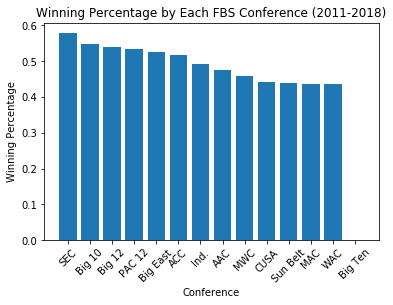

In [22]:
#order results to make graph more readable
dfPlt = dfPlt.sort_values('Win Pct', ascending = False)
#plot results
plt.bar(x = dfPlt['Team Conference'], height = dfPlt['Win Pct'])
#title
plt.title('Winning Percentage by Each FBS Conference (2011-2018)')
#labels
plt.xlabel('Conference')
plt.ylabel('Winning Percentage')
#make axis readable
plt.xticks(rotation=45)
#show
plt.show()

<Figure size 432x288 with 0 Axes>

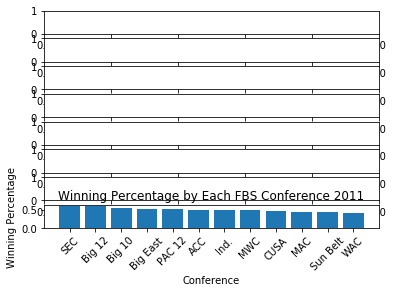

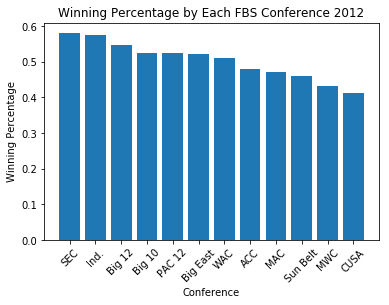

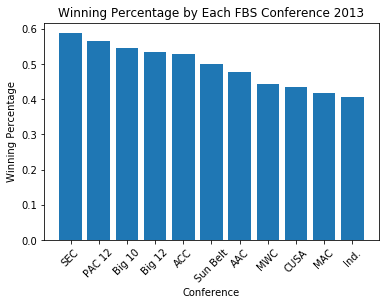

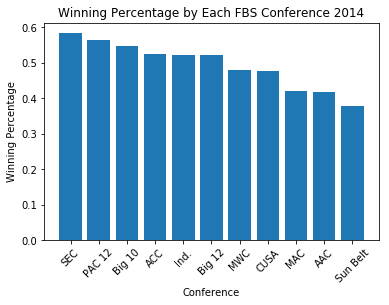

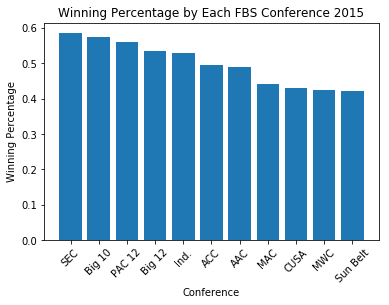

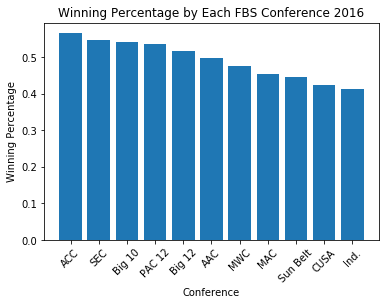

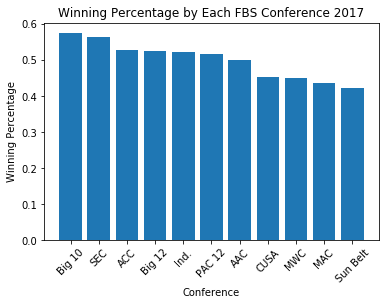

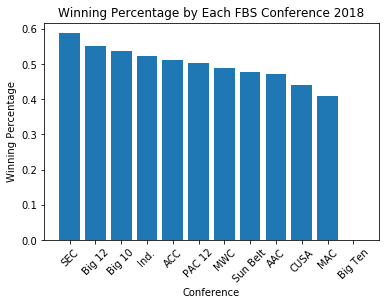

In [23]:
#win pct by conference by year for non conference games
plt.clf()

years = df.Year.unique()

df_filt = df[df['Team Conference'] != df['Opponent Conference']]

dfPlt = df.groupby(['Team Conference', 'Year']).\
           agg({'Team Win': ['sum','count']}).\
           reset_index()

#remove multi indexing
dfPlt.columns = list(map(''.join, dfPlt.columns.values))

#rename columns
dfPlt = dfPlt.rename(columns = {'Team Winsum': 'Total Wins', 'Team Wincount': 'Number of Games'})

#Win Pct column
dfPlt['Win Pct'] = dfPlt['Total Wins']/dfPlt['Number of Games']
dfPlt.sort_values(['Year', 'Win Pct'], ascending = False, inplace = True)

fig, ax = plt.subplots(len(years))

for year in years:
    #plot specific year
    dfPlt_filt = dfPlt[dfPlt.Year == year]
    
    
    plt.bar(x = dfPlt_filt['Team Conference'], height = dfPlt_filt['Win Pct'])
    
    #title
    plt.title('Winning Percentage by Each FBS Conference ' + str(year))
   
    #labels
    plt.xlabel('Conference')
    plt.ylabel('Winning Percentage')
    
    #make axis readable
    plt.xticks(rotation=45)

    plt.show()

In [24]:
[col for col in df.columns if 'Win' in col]

['Team Win',
 'Team Win_3_game_average',
 'Team Win_6_game_average',
 'Team Win_12_game_average',
 'Opp Win_3_game_average',
 'Opp Win_6_game_average',
 'Opp Win_12_game_average']